In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../../datas/bank_customer_churn.csv")
data.head()

,Row_Number,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
data.shape

(10002, 14)

In [4]:
data = data.dropna()
data = data.drop(columns='Row_Number')
data.head()

,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [5]:
bool_col = ['Has_Credit_Card', 'Is_Active_Member', 'Churn']
data[bool_col] = data[bool_col].astype(bool)
data.head()

,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,True,True,101348.88,True
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,False,True,112542.58,False
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,True,False,113931.57,True
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,False,False,93826.63,False
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,True,False,149756.71,True


In [6]:
data.shape

(9998, 13)

In [7]:
data.head()

,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,True,True,101348.88,True
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,False,True,112542.58,False
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,True,False,113931.57,True
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,False,False,93826.63,False
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,True,False,149756.71,True


EDA

Univariate Analysis

In [8]:
features = data.drop(columns=['Customer_Id', 'Churn'])

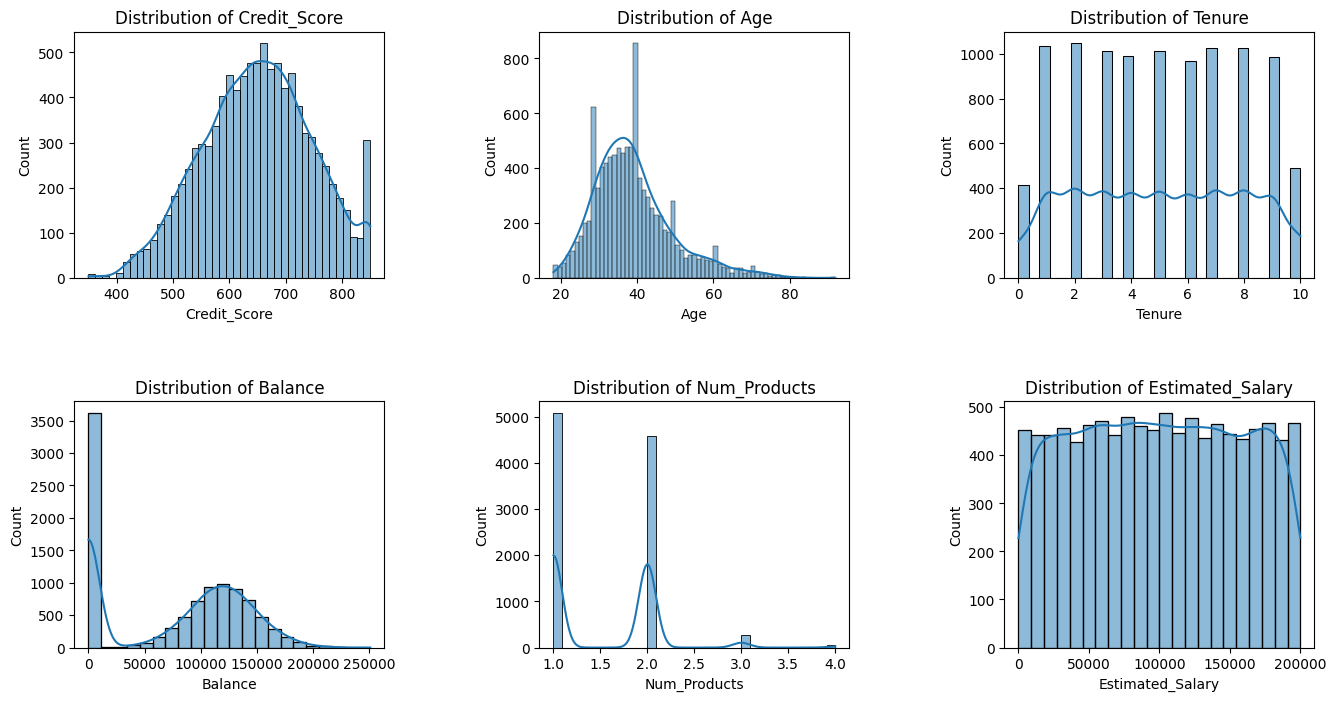

In [9]:
numerical_features = features.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    plt.subplots_adjust(wspace=.5, hspace=.5)

    

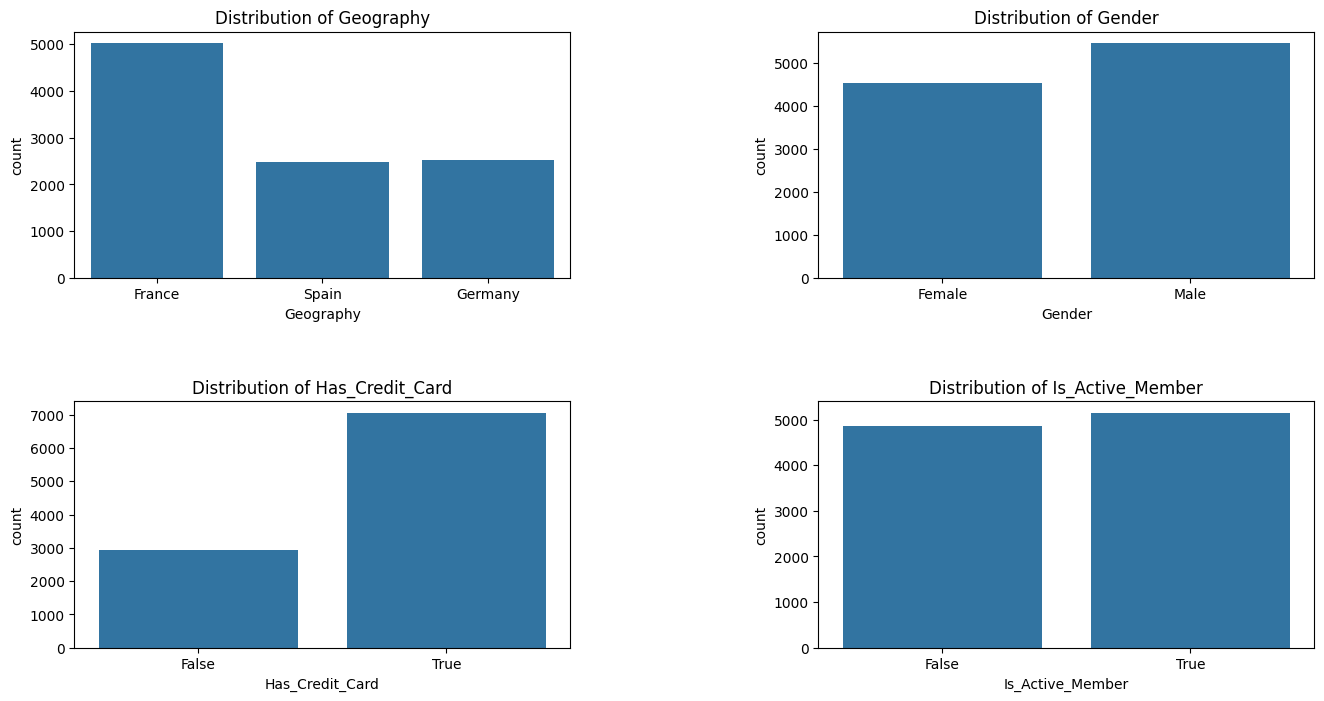

In [10]:
categorical_features = features.select_dtypes(include=['object', 'bool']).drop(columns='Surname')
categorical_features = categorical_features.columns

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    plt.subplots_adjust(wspace=.5, hspace=.5)

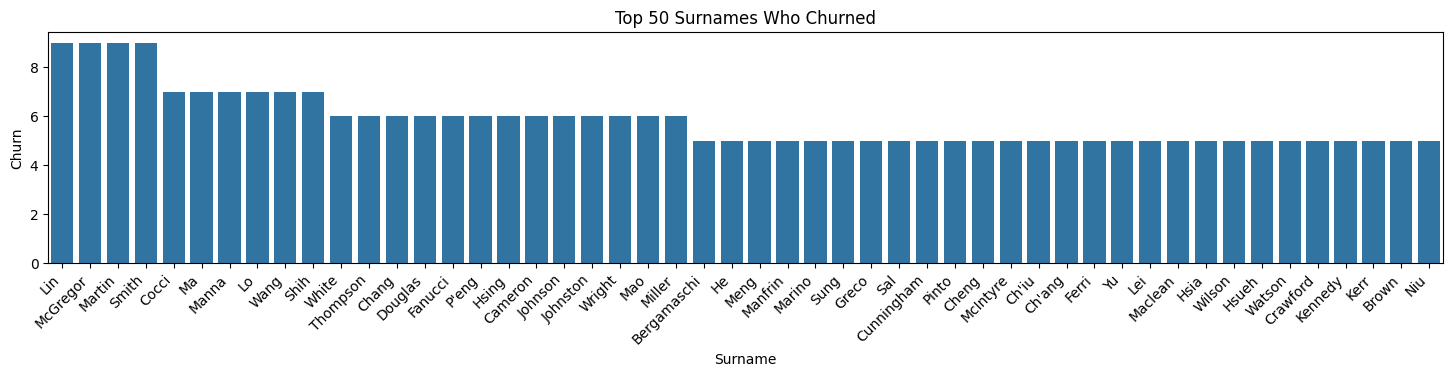

In [11]:
surnames = data[['Surname', 'Churn']]
surnames = surnames[surnames['Churn'] == True].groupby(['Surname']).count()
surnames = surnames.sort_values('Churn', ascending=False).head(50)

plt.figure(figsize=(18, 3))
sns.barplot(surnames, x='Surname', y='Churn')
plt.title(f'Top 50 Surnames Who Churned')
plt.xticks(rotation=45, ha='right')
plt.show()

Bivariate Analysis

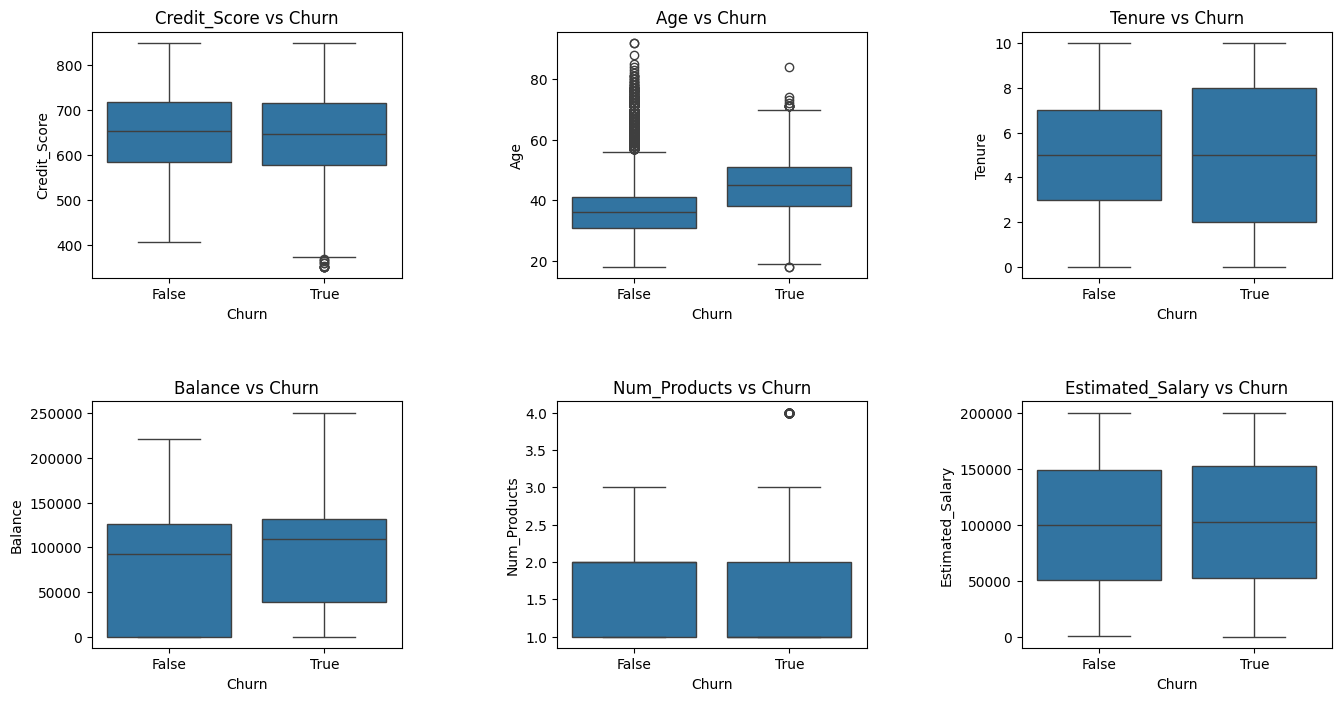

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data, x='Churn', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    plt.subplots_adjust(wspace=.5, hspace=.5)


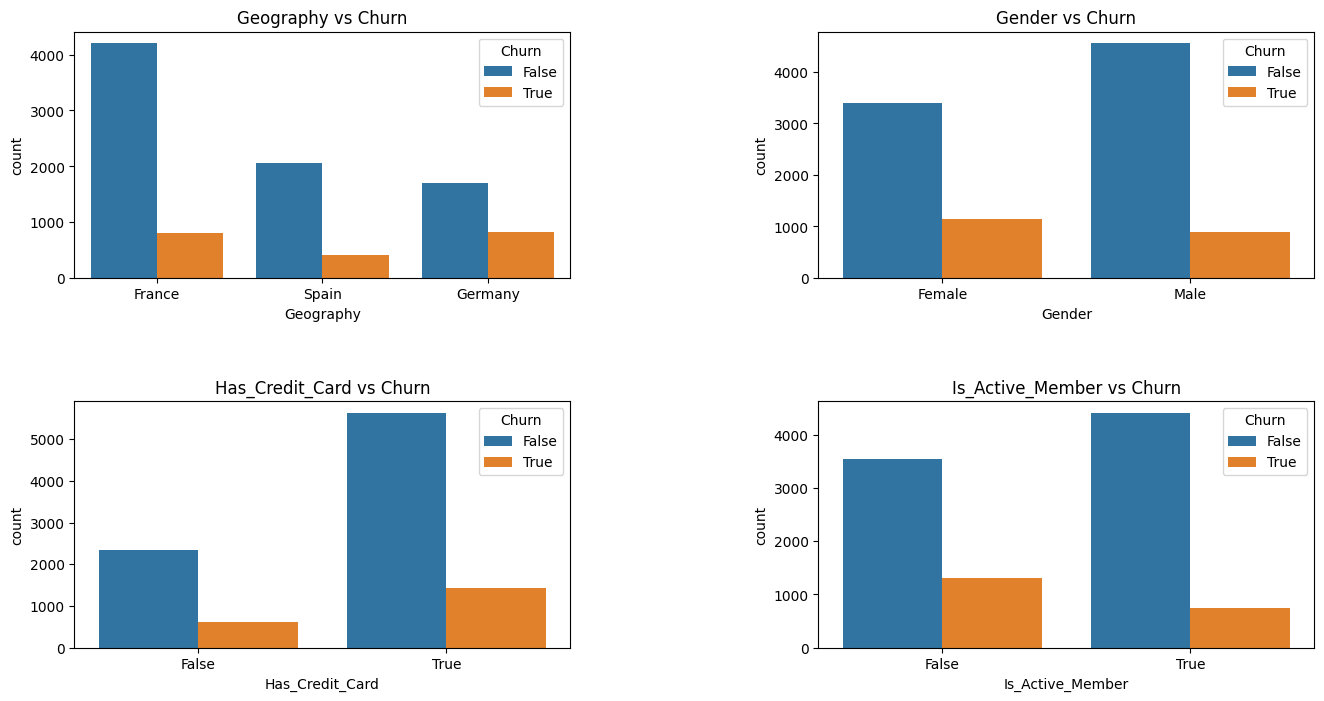

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data= data, x=feature, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    plt.subplots_adjust(wspace=.5, hspace=.5)

Multivariate Analysis

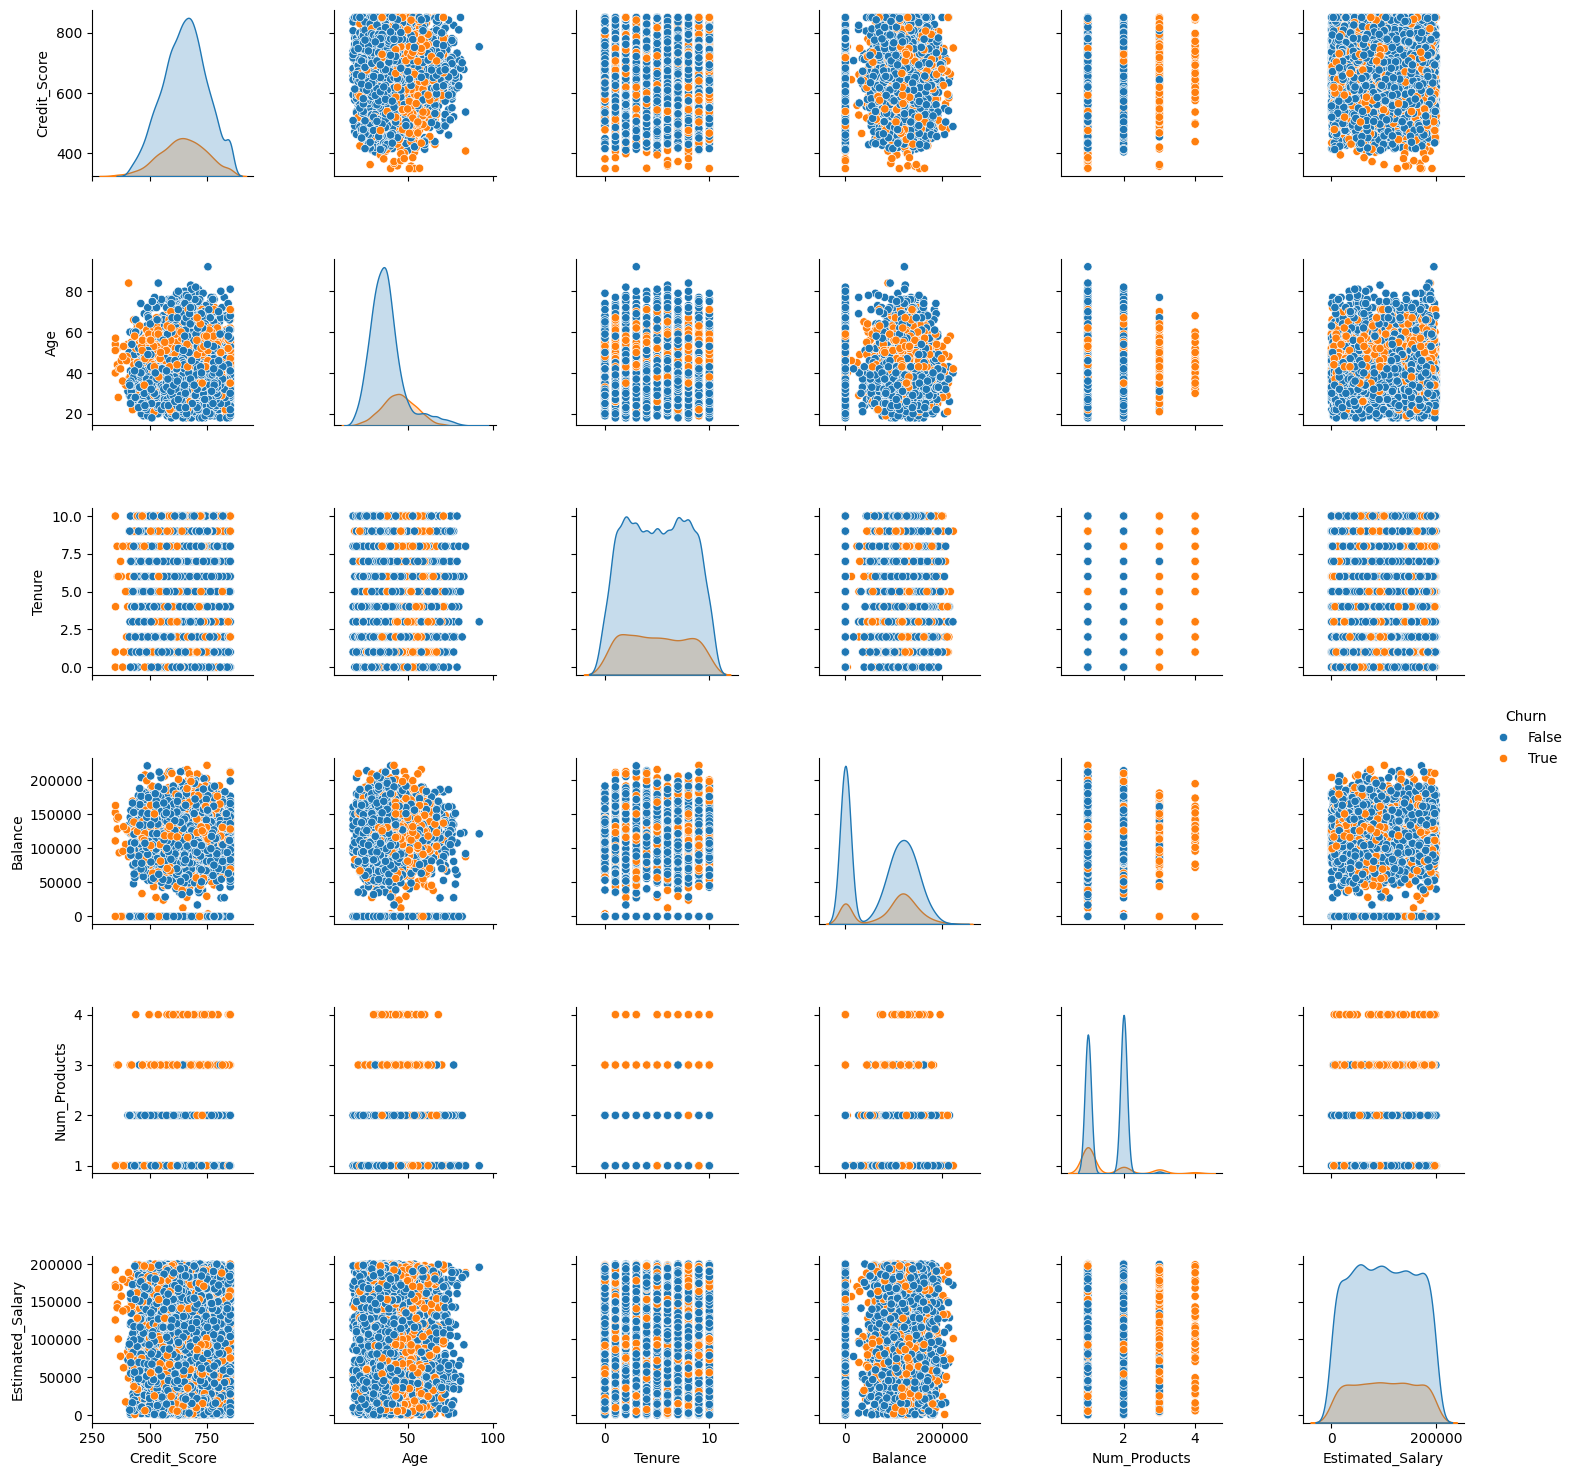

In [14]:
df_sample =  data.sample(frac=0.75)

sns.pairplot(df_sample, hue='Churn', vars=numerical_features)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

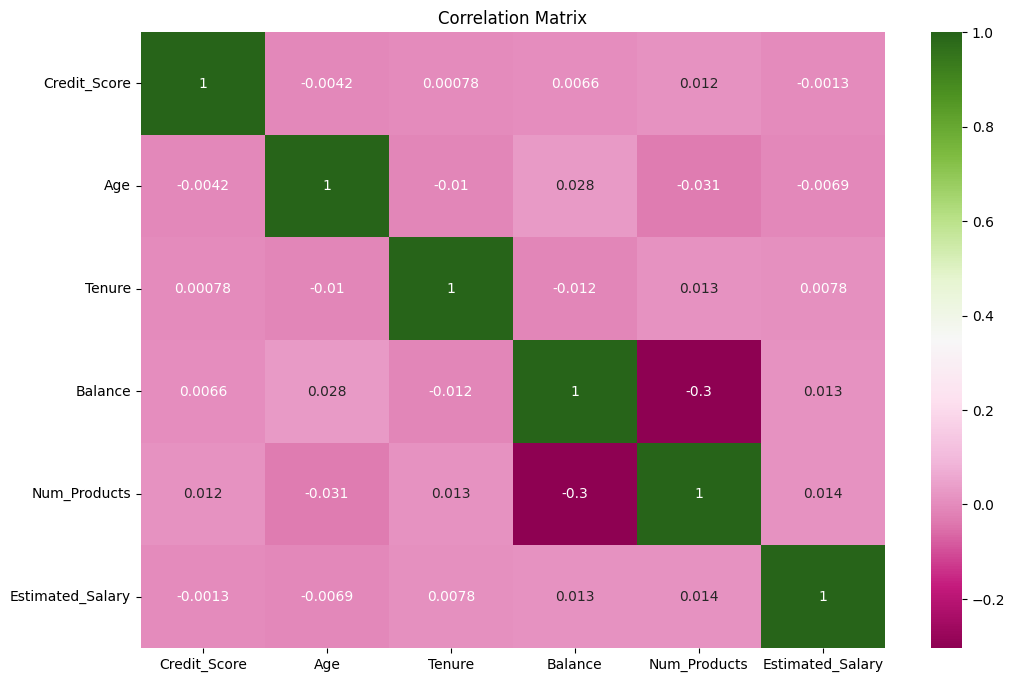

In [15]:
correlation_matrix = features[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()

Prediction Modeling

In [16]:
data = data.drop(columns='Customer_Id')
data.head()

,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn
0,Hargrave,619,France,Female,42.0,2,0.00,1,True,True,101348.88,True
1,Hill,608,Spain,Female,41.0,1,83807.86,1,False,True,112542.58,False
2,Onio,502,France,Female,42.0,8,159660.80,3,True,False,113931.57,True
3,Boni,699,France,Female,39.0,1,0.00,2,False,False,93826.63,False
5,Chu,645,Spain,Male,44.0,8,113755.78,2,True,False,149756.71,True


Feature Engineering

In [17]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'])
data.head()


,Surname,Credit_Score,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Churn,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42.0,2,0.00,1,True,True,101348.88,True,True,False,True,False,False
1,Hill,608,41.0,1,83807.86,1,False,True,112542.58,False,True,False,False,False,True
2,Onio,502,42.0,8,159660.80,3,True,False,113931.57,True,True,False,True,False,False
3,Boni,699,39.0,1,0.00,2,False,False,93826.63,False,True,False,True,False,False
5,Chu,645,44.0,8,113755.78,2,True,False,149756.71,True,False,True,False,False,True


In [18]:
data.shape

(9998, 15)

In [19]:
X = data.drop(columns=['Churn', 'Surname'])
y = data['Churn']

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(7998, 13)

In [31]:
# Baseline model with Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy:
 0.818
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.97      0.90      1610
        True       0.60      0.21      0.31       390

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000

AUC-ROC Score: 0.7764739608217869


In [32]:
# XGBoost start
import xgboost as xgb

model = xgb.XGBClassifier(random_state=21, eval_metric='logloss', objective='binary:logistic')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy:
 0.858
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.95      0.91      1610
        True       0.69      0.49      0.57       390

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000

AUC-ROC Score: 0.840539894887721


In [33]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.5, 0.8]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best AUC-ROC Score: 0.8641295394168571


In [34]:
# XGBoost tuned hyperparameters
import xgboost as xgb

model = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=300,
    subsample=0.6,
    colsample_bytree=0.8,
    random_state=21, 
    objective='binary:logistic'
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy:
 0.867
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92      1610
        True       0.80      0.42      0.55       390

    accuracy                           0.87      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000

AUC-ROC Score: 0.8716260551043159


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Test data on kaggle

In [35]:
k_data = pd.read_csv('../../datas/churn_test.csv')
k_data = k_data.dropna()
k_data = k_data.drop(columns=['Customer_Id', 'Surname'])
k_data.head()

,id,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary
0,165034,586,France,Female,23.0,2,0.00,2,0,1,160976.75
1,165035,683,France,Female,46.0,2,0.00,1,1,0,72549.27
2,165036,656,France,Female,34.0,7,0.00,2,1,0,138882.09
3,165037,681,France,Male,36.0,8,0.00,1,1,0,113931.57
4,165038,752,Germany,Male,38.0,10,121263.62,1,1,0,139431.00


In [36]:
bool_col = ['Has_Credit_Card', 'Is_Active_Member']
k_data[bool_col] = k_data[bool_col].astype(bool)

k_data = pd.get_dummies(k_data, columns=['Gender', 'Geography'])

k_data.head()

,id,Credit_Score,Age,Tenure,Balance,Num_Products,Has_Credit_Card,Is_Active_Member,Estimated_Salary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,165034,586,23.0,2,0.00,2,False,True,160976.75,True,False,True,False,False
1,165035,683,46.0,2,0.00,1,True,False,72549.27,True,False,True,False,False
2,165036,656,34.0,7,0.00,2,True,False,138882.09,True,False,True,False,False
3,165037,681,36.0,8,0.00,1,True,False,113931.57,False,True,True,False,False
4,165038,752,38.0,10,121263.62,1,True,False,139431.00,False,True,False,True,False


In [38]:
from sklearn.preprocessing import StandardScaler

k_X = k_data.drop(columns='id')

scaler = StandardScaler()
k_X_scaled = scaler.fit_transform(k_X)


In [39]:
# predict k_X_scaled or new_data_features for cnn
new_pred = model.predict(k_X_scaled)

In [40]:
k_data['Exited'] = new_pred
submission = k_data[['id', 'Exited']]
submission

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


In [41]:
submission.to_csv('churn_submission2.csv', index=False)

Kaggle Score: 0.71